In [1]:
from dotenv import load_dotenv
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import humanize
import pandas as pd
import seaborn as sns
import numpy as np
import pymongo
import warnings
import os

In [2]:
sns.set_style("darkgrid")
plt.rcParams['figure.dpi'] = 80

fotmat_tick_humanize = lambda x, pos: humanize.intword(x)

In [3]:
load_dotenv()
warnings.filterwarnings('ignore')

In [5]:
client = pymongo.MongoClient(os.getenv('MONGO_URI'))
db = client[os.getenv('MONGO_DATABASE')]
collection = db['scrapy_bogota_apartments']

df = pd.DataFrame(list(collection.find()))
df = df.drop(columns=['_id'], axis=1)

df.head(3)

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,descripcion,imagenes,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo
0,4133491,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,BRITALIA,...,"apartamento en venta de 76m2, con vista exteri...",[https://d3hzflklh28tts.cloudfront.net/venta-a...,habi.co,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,https://habi.co/page-data/venta-apartamentos/1...,"[{'fecha': 2024-07-03 23:27:30.843000, 'precio...",NaN,NaN,NaN
1,3889852,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,SAN CRISTOBAL NORTE,...,"apartamento en venta de 60m2, con vista interi...",[https://d3hzflklh28tts.cloudfront.net/venta-2...,habi.co,2024-09-08 21:28:24.710,2024-07-03 23:27:31.667,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN
2,4386770,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,LA SABANA,...,"apartamento en venta de 54m2, con vista exteri...",[https://d3hzflklh28tts.cloudfront.net/venta-9...,habi.co,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN


In [6]:
df.shape

(44436, 26)

In [7]:
df.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'caracteristicas', 'descripcion', 'imagenes', 'website', 'last_view',
       'datetime', 'url', 'timeline', 'estado', 'compañia', 'precio_arriendo'],
      dtype='object')

In [8]:
df.duplicated(subset=['codigo']).sum()

np.int64(0)

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['last_view'] = pd.to_datetime(df['last_view'])

In [10]:
# sacar solo el mes de datetime
df['month'] = df['datetime'].dt.month
# cambiar el numero del mes por el nombre
df['month_name'] = df['month'].replace({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio',
                                   7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})

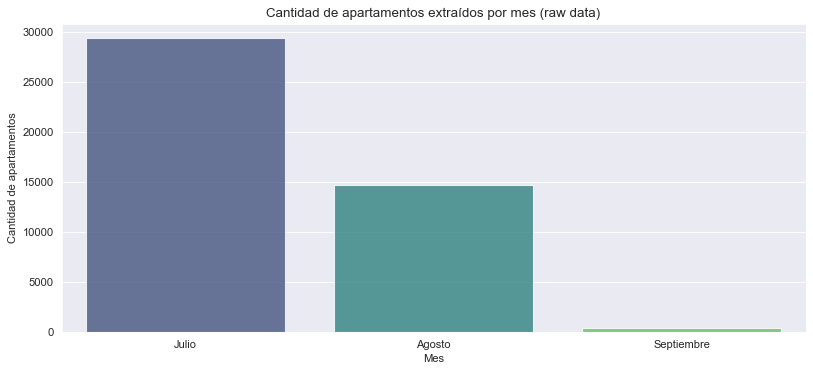

In [11]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='viridis',
    alpha=0.8,
    # edgecolor='black',
    # linewidth=.6
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

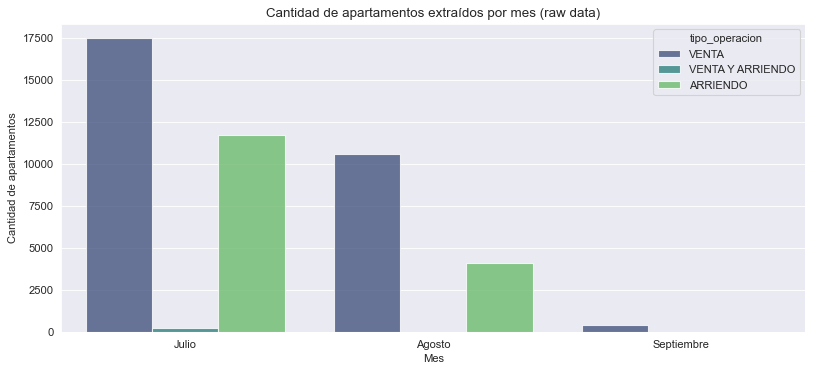

In [11]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='viridis',
    alpha=0.8,
    hue='tipo_operacion',
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

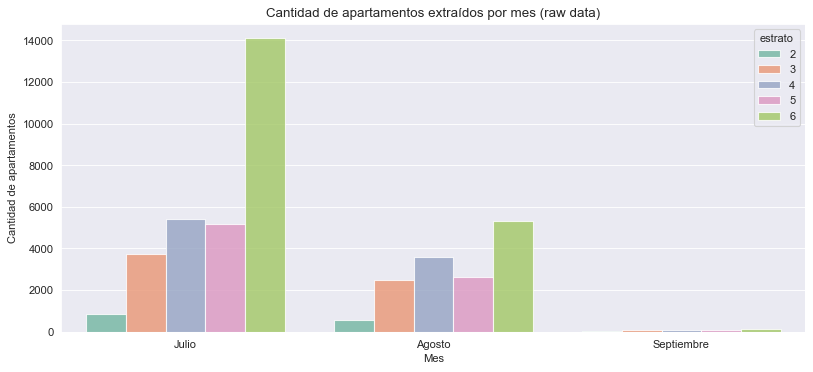

In [12]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='Set2',
    alpha=0.8,
    hue='estrato',
    hue_order=[2, 3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

In [13]:
df['tipo_operacion'].value_counts()

tipo_operacion
VENTA               28410
ARRIENDO            15784
VENTA Y ARRIENDO      242
Name: count, dtype: int64

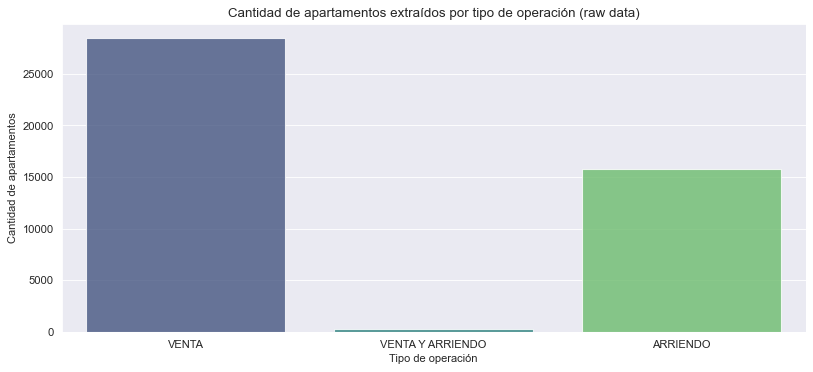

In [14]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='tipo_operacion', 
    data=df, 
    palette='viridis',
    alpha=0.8,
)

plt.title('Cantidad de apartamentos extraídos por tipo de operación (raw data)')
plt.xlabel('Tipo de operación')
plt.ylabel('Cantidad de apartamentos')
plt.show()

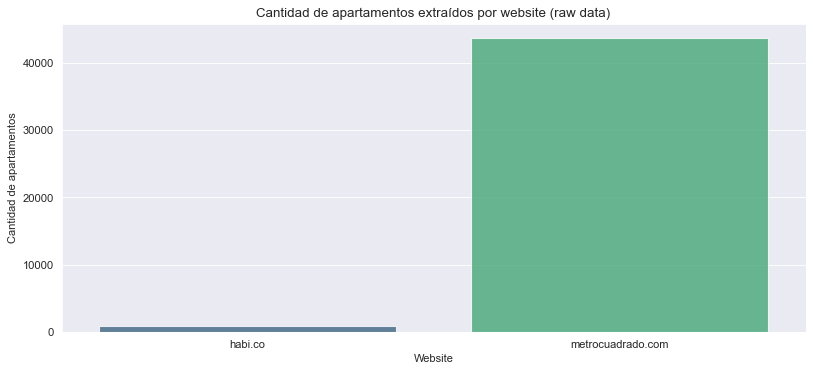

In [15]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='website', 
    data=df, 
    palette='viridis',
    alpha=0.8,
)

plt.title('Cantidad de apartamentos extraídos por website (raw data)')
plt.xlabel('Website')
plt.ylabel('Cantidad de apartamentos')
plt.show()

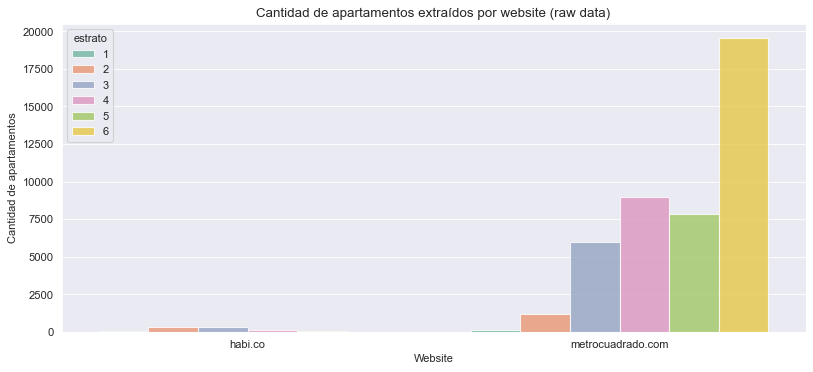

In [16]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='website', 
    data=df, 
    palette='Set2',
    alpha=0.8,
    hue='estrato',
    hue_order=[1, 2, 3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos extraídos por website (raw data)')
plt.xlabel('Website')
plt.ylabel('Cantidad de apartamentos')
plt.show()